In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 109)
import matplotlib.dates as md
import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('data/export.csv.csv')
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.088670,15.726712,177.362361,4.433040,-0.350361,2.816667,212.834

In [3]:
sm_df = pd.read_excel('data/store_master.xlsx')
sm_df.head(2)

,DIV,STORE,OPEN_DATE,CLOSE_DATE,STORE_STATE,STORE_ZIP,STORE_CITY,GROSS_FEET,CLASS,RPTCODE,VOLUME_BAND
0,7,1504,01-MAY-12,NaN,NV,89109,LAS VEGAS,1849,Mall,S,2
1,7,1505,29-MAY-84,NaN,CA,92626,COSTA MESA,1876,Mall,S,5


### MAPPED RELEVANT COLUMNS FROM SM_DF TO DF

In [4]:
mapping1 = dict(sm_df[['STORE', 'STORE_CITY']].values)
df['STORE_CITY'] = df.STORE.map(mapping1)
df.head(2)

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.0,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.25000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.5,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.94149,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS


In [5]:
mapping2 = dict(sm_df[['STORE', 'CLASS']].values)
df['CLASS'] = df.STORE.map(mapping2)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,5,5,60,0.136601,0.0,0.0

In [6]:
mapping3 = dict(sm_df[['STORE', 'CLOSE_DATE']].values)
df['CLOSE_DATE'] = df.STORE.map(mapping3)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,253.00,61,1,5,4,0,1,6,0,73,

In [7]:
mapping4 = dict(sm_df[['STORE', 'GROSS_FEET']].values)
df['GROSS_FEET'] = df.STORE.map(mapping4)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92.5,6,2

In [8]:
mapping5 = dict(sm_df[['STORE', 'OPEN_DATE']].values)
df['OPEN_DATE'] = df.STORE.map(mapping5)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,ACCESSORY_OTHER_VALUE,TRANS_CNT_SALES,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,317.00,107,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,309.50,86,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,89.25,74,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00

In [9]:
mapping6 = dict(sm_df[['STORE', 'VOLUME_BAND']].values)
df['VOLUME_BAND'] = df.STORE.map(mapping6)
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

### INDENTIFY AND REMOVE ANY OUTLIERS

In [10]:
df.COMP_PCT.nlargest(10)

26686    245.175193
10491     20.424050
457        7.945772
8460       6.630358
7530       5.554588
2526       5.506788
9550       4.245985
21338      3.803657
2525       3.721613
12971      3.540078
Name: COMP_PCT, dtype: float64

In [11]:
df = df.query('COMP_PCT != "245.175193"')
df

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.00,192,7,1168,186.88,22003.18,114,51,105,121,0.73910,0.86780,0.80350,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.00,2,61.50,13,2323.95,83,5709.92,4,192.00,24,1365.15,31,223.00,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.000000,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.00,181,7,891,180.31,17499.86,94,33,74,94,0.51560,0.78720,0.65140,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.80,2,45.00,11,2550.00,76,4994.86,2,94.00,9,511.97,38,192.00,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.000000,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.00,183,7,930,182.23,15004.60,79,39,65,78,0.69640,0.83330,0.76490,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.60,4,109.50,3,455.99,52,3507.96,2,117.00,9,549.70,49,249.00,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.000000,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.00,183,7,812,183.17,12770.59,72,34,56,72,0.50750,0.77780,0.64260,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.70,0,0.

In [12]:
df = df.query('COMP_PCT != "20.424050"')
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

In [13]:
df = df.query('COMP_PCT != "7.945772"')
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

In [14]:
df = df.query('COMP_PCT != "6.630358"')
df.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
0,7,1504,06-FEB-16,2017,1,1,22003.18,21266.87,0.034622,2016,1,1,07-FEB-15,1855.11,0.0,192,7,1168,186.88,22003.18,114,51,105,121,0.7391,0.8678,0.8035,69,892.46,296,22003.18,63,9955.58,25,4240.92,193.37,2858.49,233,12047.60,55,668.0,2,61.5,13,2323.95,83,5709.92,4,192.0,24,1365.15,31,223.0,6,...,0,7,5,0,2,0,0,114,7,7,107,0.084311,0.0,0.097603,18.838339,193.010351,6.250000,-0.062981,2.766355,205.637196,0.396825,0.040561,0.212838,0.787162,0.013453,158.025079,51.706438,0.452461,0.547539,0.425984,0.129913,14.782490,113.787971,1,286,286.0,0,0,0.0,2,934,467.0,1,47,47.0,4,1267,317,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
1,7,1504,13-FEB-16,2017,2,1,17499.35,23490.64,-0.255050,2016,2,1,14-FEB-15,1986.70,0.0,181,7,891,180.31,17499.86,94,33,74,94,0.5156,0.7872,0.6514,64,1913.86,270,17499.35,54,7630.28,29,3869.02,181.26,2593.15,216,9869.07,56,633.8,2,45.0,11,2550.00,76,4994.86,2,94.0,9,511.97,38,192.0,7,...,2,3,3,0,0,5,0,96,3,3,84,0.113530,0.0,0.105499,19.640123,186.163298,4.941490,-0.360549,3.214286,208.325595,0.537037,0.109367,0.200000,0.800000,0.015429,141.301481,45.690139,0.436032,0.563968,0.507061,0.148186,14.306245,96.542811,1,293,293.0,0,0,0.0,2,948,474.0,1,54,54.0,4,1295,324,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
2,7,1504,20-FEB-16,2017,3,1,15004.60,22318.80,-0.327715,2016,3,1,21-FEB-15,1331.95,0.0,183,7,930,182.23,15004.60,79,39,65,78,0.6964,0.8333,0.7649,56,2799.29,211,15004.60,65,9422.12,28,3751.73,183.26,2737.61,146,5582.48,21,230.6,4,109.5,3,455.99,52,3507.96,2,117.0,9,549.70,49,249.0,2,...,0,3,3,0,0,2,0,79,3,3,74,0.088769,0.0,0.084946,16.133978,189.931646,5.103441,-0.412661,2.851351,202.764865,0.430769,0.186562,0.308057,0.691943,0.014062,144.955692,38.236164,0.627949,0.372051,0.398183,0.182451,14.938394,81.876023,1,300,300.0,0,0,0.0,2,962,481.0,1,61,61.0,4,1323,331,LAS VEGAS,Mall,NaN,1849,01-MAY-12,2
3,7,1504,27-FEB-16,2017,4,1,12770.09,17296.40,-0.261691,2016,4,1,28-FEB-15,1744.41,0.0,183,7,812,183.17,12770.59,72,34,56,72,0.5075,0.7778,0.6426,67,2273.05,169,12770.09,43,6204.59,22,3178.74,183.27,2366.12,126,6565.50,20,218.7,0,0.0,6,898.00,64,4198.91,1,42.0,10,524.65,13,92

### SET ARBITRARY LIMITS FOR WHAT MIGHT CONSTITUTE A SUCCESSFUL STORE

In [15]:
df_filter = df.loc[(df['COMP_PCT'] > .5) & (df["STRAK_COMP_TRAFFIC_DELTA"] > 0)  
                   & (df["SALES_AMT_PER_PAY_HOUR"] > 150)
                & (df['CLOSE_DATE'] != "NaN")
                & (df['PAYROLL_PCT'] < .1 )
                & (df['SALES_AMT_TY'] > 20000)]
df_filter.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
773,7,1521,11-NOV-17,2018,41,10,24935.12,10227.25,1.438106,2017,41,10,12-NOV-16,856.10,962.61,117,7,804,120.92,24935.12,104,65,111,119,0.61321,0.93277,0.77299,106,3051.38,255,24935.12,88,15848.73,41,7446.96,120.91,2493.43,167,9086.39,67,758.40,2,47.0,10,3919.00,29,2160.00,4,167.99,31,1874.50,24,159.50,0,...,6,9,6,0,3,1,0,110,9,9,88,0.034333,0.094122,0.129353,31.013831,239.760769,6.649024,1.308753,2.897727,283.353636,0.465909,0.122373,0.345098,0.654902,0.010227,180.099205,54.409521,0.635599,0.364401,0.469877,0.099997,20.622198,206.228765,1,9213,9213.0,1,3936,3936.0,0,0,0.0,1,362,362.00,3,13511,4504,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
789,7,1521,10-MAR-18,2019,5,2,25110.40,15673.74,0.602068,2018,6,2,11-MAR-17,1770.55,1074.34,109,7,832,108.81,25110.40,127,83,139,152,0.63359,0.91447,0.77403,131,4368.14,352,25110.40,107,16587.06,59,9085.51,108.81,2106.62,245,8523.34,86,938.00,10,227.0,5,766.00,62,4182.35,2,74.01,35,2043.48,45,292.50,0,...,10,16,9,1,6,1,0,137,16,16,100,0.070511,0.068544,0.152644,30.180769,197.719685,7.646356,0.449424,3.520000,251.104000,0.551402,0.173957,0.303977,0.696023,0.014018,155.019252,34.789143,0.660565,0.339435,0.547747,0.083894,19.360537,230.772907,1,9332,9332.0,1,4055,4055.0,0,0,0.0,2,596,298.00,4,13983,3496,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
833,7,1521,26-JAN-19,2019,51,12,24603.51,14623.74,0.682436,2018,52,12,27-JAN-18,910.15,1461.91,103,7,1115,103.02,24603.51,142,94,142,171,0.67626,0.83041,0.75333,139,3968.41,282,24603.51,109,16365.98,42,6518.49,103.04,2459.32,173,8237.53,46,466.39,3,64.0,9,3783.46,21,1397.71,3,85.99,31,1944.99,59,427.00,0,...,10,21,15,1,5,2,0,152,21,21,109,0.036993,0.099968,0.127354,22.065928,173.264155,10.823141,0.555082,2.587156,225.720275,0.385321,0.161294,0.386525,0.613475,0.011462,150.146606,47.615780,0.665189,0.334811,0.398295,0.099958,23.867624,238.776300,1,9654,9654.0,1,4377,4377.0,0,0,0.0,1,176,176.00,3,14207,4736,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
1324,7,1547,04-NOV-17,2018,40,10,40884.37,25397.66,0.609769,2017,40,10,05-NOV-16,1400.09,1420.21,188,7,2204,193.42,40884.37,224,141,198,256,0.65581,0.77344,0.71463

### FIND STORES WITH AT LEAST ONE YEAR OF EXISTENCE

In [16]:
stores = df_filter[
     (df_filter.FISCAL_YEAR.isin([2017, 2018, 2019, 2020]))]
stores.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
773,7,1521,11-NOV-17,2018,41,10,24935.12,10227.25,1.438106,2017,41,10,12-NOV-16,856.10,962.61,117,7,804,120.92,24935.12,104,65,111,119,0.61321,0.93277,0.77299,106,3051.38,255,24935.12,88,15848.73,41,7446.96,120.91,2493.43,167,9086.39,67,758.40,2,47.0,10,3919.00,29,2160.00,4,167.99,31,1874.50,24,159.50,0,...,6,9,6,0,3,1,0,110,9,9,88,0.034333,0.094122,0.129353,31.013831,239.760769,6.649024,1.308753,2.897727,283.353636,0.465909,0.122373,0.345098,0.654902,0.010227,180.099205,54.409521,0.635599,0.364401,0.469877,0.099997,20.622198,206.228765,1,9213,9213.0,1,3936,3936.0,0,0,0.0,1,362,362.00,3,13511,4504,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
789,7,1521,10-MAR-18,2019,5,2,25110.40,15673.74,0.602068,2018,6,2,11-MAR-17,1770.55,1074.34,109,7,832,108.81,25110.40,127,83,139,152,0.63359,0.91447,0.77403,131,4368.14,352,25110.40,107,16587.06,59,9085.51,108.81,2106.62,245,8523.34,86,938.00,10,227.0,5,766.00,62,4182.35,2,74.01,35,2043.48,45,292.50,0,...,10,16,9,1,6,1,0,137,16,16,100,0.070511,0.068544,0.152644,30.180769,197.719685,7.646356,0.449424,3.520000,251.104000,0.551402,0.173957,0.303977,0.696023,0.014018,155.019252,34.789143,0.660565,0.339435,0.547747,0.083894,19.360537,230.772907,1,9332,9332.0,1,4055,4055.0,0,0,0.0,2,596,298.00,4,13983,3496,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
833,7,1521,26-JAN-19,2019,51,12,24603.51,14623.74,0.682436,2018,52,12,27-JAN-18,910.15,1461.91,103,7,1115,103.02,24603.51,142,94,142,171,0.67626,0.83041,0.75333,139,3968.41,282,24603.51,109,16365.98,42,6518.49,103.04,2459.32,173,8237.53,46,466.39,3,64.0,9,3783.46,21,1397.71,3,85.99,31,1944.99,59,427.00,0,...,10,21,15,1,5,2,0,152,21,21,109,0.036993,0.099968,0.127354,22.065928,173.264155,10.823141,0.555082,2.587156,225.720275,0.385321,0.161294,0.386525,0.613475,0.011462,150.146606,47.615780,0.665189,0.334811,0.398295,0.099958,23.867624,238.776300,1,9654,9654.0,1,4377,4377.0,0,0,0.0,1,176,176.00,3,14207,4736,BOCA RATON,Mall,NaN,2302,29-MAY-84,3
1324,7,1547,04-NOV-17,2018,40,10,40884.37,25397.66,0.609769,2017,40,10,05-NOV-16,1400.09,1420.21,188,7,2204,193.42,40884.37,224,141,198,256,0.65581,0.77344,0.71463

### GROUP DF BY 'FISCAL_YEAR' AND 'STORE'

In [17]:
fiscal_gb = stores.groupby(['FISCAL_YEAR', 'STORE']).agg({'COMP_PCT': 'mean','PAYROLL_PCT': 'mean', 
                                       'STRAK_COMP_TRAFFIC_DELTA': 'mean', 'DOLLAR_PER_TRANS': 'mean',
                                       'SALES_AMT_PER_PAY_HOUR':'mean', 'AVG_PAY_PER_HR': 'mean', 
                                        'SALES_AMT_TY': 'mean','SALES_AMT_LY': 'mean', 'VOLUME_BAND':'max',
                                        'NUM_OF_EMPS': 'mean', 'CLOSE_DATE': 'max'}).apply(lambda x: x).sort_values(by='FISCAL_YEAR') 
fiscal_gb.head()

COMP_PCT  PAYROLL_PCT  STRAK_COMP_TRAFFIC_DELTA  \
FISCAL_YEAR STORE                                                    
2017        1549   0.622171     0.098938                  0.449455   
            2079   0.532088     0.086585                  0.377591   
            2076   0.619768     0.094664                  0.413081   
            2063   0.502911     0.089197                  0.387339   
            2057   0.693734     0.090021                  0.562145   

                   DOLLAR_PER_TRANS  SALES_AMT_PER_PAY_HOUR  AVG_PAY_PER_HR  \
FISCAL_YEAR STORE                                                             
2017        1549         218.524340              172.888342       17.105240   
            2079         158.663143              216.990075       18.787981   
            2076         192.647905              168.090660       15.912166   
            2063         150.668783              202.592487       18.070717   
            2057         154.020186              281.899563       25.677232   

                   SALES_AMT_TY  SALES_AMT_LY  VOLUME_BAND  NUM_OF_EMPS  \
FISCAL_YEAR STORE                                                         
2017        1549       23163.58     14279.370            3          3.0   
            2079       27766.05     18123.010            4          4.0   
            2076       20228.03     12488.230            2          4.0   
            2063       28476.40     18947.490            3          3.0   
            2057       32245.61     19275.845            3          2.5   

                  CLOSE_DATE  
FISCAL_YEAR STORE             
2017        1549         NaN  
            2079         NaN  
            2076         NaN  
            2063         NaN  
            2057         NaN

In [36]:
fiscal_gb = fiscal_gb.reset_index()
fiscal_gb.head()

,index,FISCAL_YEAR,STORE,COMP_PCT,PAYROLL_PCT,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE
0,0,2017,1549,0.622171,0.098938,0.449455,218.524340,172.888342,17.105240,23163.58,14279.370,3,3.0,NaN
1,1,2017,2079,0.532088,0.086585,0.377591,158.663143,216.990075,18.787981,27766.05,18123.010,4,4.0,NaN
2,2,2017,2076,0.619768,0.094664,0.413081,192.647905,168.090660,15.912166,20228.03,12488.230,2,4.0,NaN
3,3,2017,2063,0.502911,0.089197,0.387339,150.668783,202.592487,18.070717,28476.40,18947.490,3,3.0,NaN
4,4,2017,2057,0.693734,0.090021,0.562145,154.020186,281.899563,25.677232,32245.61,19275.845,3,2.5,NaN


In [21]:
fiscal_years = fiscal_gb[
     (fiscal_gb.STORE.isin([1662,
1718,
1649,
2046,
2019,
1722,
1724,
1823,
2009,
2085,
1666]))
 ]
fiscal_years.head()

,FISCAL_YEAR,STORE,COMP_PCT,PAYROLL_PCT,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,VOLUME_BAND,NUM_OF_EMPS,CLOSE_DATE
5,2017,2046,1.321433,0.092224,1.196518,214.089172,241.493034,22.271430,64654.930,27851.300,5,5.0,NaN
6,2017,2019,0.617624,0.077954,0.476839,168.770958,195.593804,15.017017,28022.015,17571.415,5,3.0,NaN
7,2017,2009,0.653446,0.096257,0.491861,151.743651,229.015012,22.044318,28679.550,17345.320,3,5.0,NaN
9,2017,1724,0.604876,0.095862,0.510936,176.606639,249.848602,23.909945,38983.095,24213.910,5,5.0,NaN
16,2017,1666,1.320526,0.091764,1.235929,210.808918,297.995701,27.345235,40896.930,17623.990,3,4.0,NaN


### GRAPH VARIOUS METRICS FOR COMPARISON

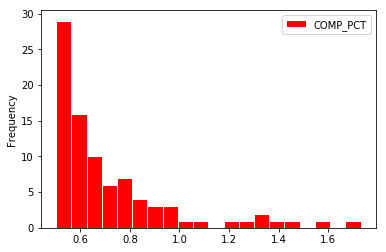

In [22]:
fiscal_gb.reset_index().plot(x='FISCAL_YEAR', y='COMP_PCT', kind='hist', bins=20, ec='white', color='red')
#fiscal_years.plot(x='index', y='VOLUME_BAND', kind='scatter')

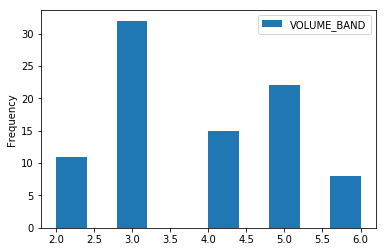

In [23]:
fiscal_gb.plot(x='STORE', y='VOLUME_BAND', kind='hist')

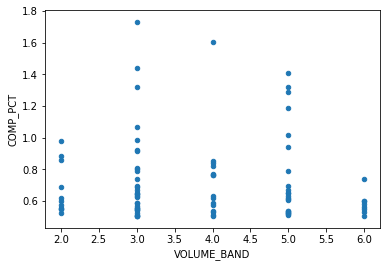

In [24]:
fiscal_gb.plot(x='VOLUME_BAND', y='COMP_PCT', kind='scatter')

In [25]:
store_corr = fiscal_years.corr(method='pearson')
store_corr

,FISCAL_YEAR,STORE,COMP_PCT,PAYROLL_PCT,STRAK_COMP_TRAFFIC_DELTA,DOLLAR_PER_TRANS,SALES_AMT_PER_PAY_HOUR,AVG_PAY_PER_HR,SALES_AMT_TY,SALES_AMT_LY,VOLUME_BAND,NUM_OF_EMPS
FISCAL_YEAR,1.000000,-0.030612,-0.116390,0.104638,-0.151456,0.146669,-0.176007,-0.153848,-0.065773,-0.044060,-0.110651,0.184041
STORE,-0.030612,1.000000,0.138564,-0.226294,0.085040,-0.591802,-0.014581,-0.101811,0.090000,-0.032646,-0.093373,0.087677
COMP_PCT,-0.116390,0.138564,1.000000,-0.065613,0.994698,-0.125954,0.215084,0.199367,0.366674,-0.079347,-0.096093,-0.098758
PAYROLL_PCT,0.104638,-0.226294,-0.065613,1.000000,-0.044039,-0.171205,-0.243304,0.152609,-0.115911,-0.057988,-0.227400,-0.047518
STRAK_COMP_TRAFFIC_DELTA,-0.151456,0.085040,0.994698,-0.044039,1.000000,-0.113722,0.219568,0.213302,0.389699,-0.046546,-0.083224,-0.102270
DOLLAR_PER_TRANS,0.146669,-0.591802,-0.125954,-0.171205,-0.113722,1.000000,0.205812,0.137366,0.003876,0.012149,0.027879,-0.133116
SALES_AMT_PER_PAY_HOUR,-0.176007,-0.014581,0.215084,-0.243304,0.219568,0.205812,1.000000,0.919870,0.221458,0.139817,-0.126310,-0.115679
AVG_PAY_PER_HR,-0.153848,-0.101811,0.199367,0.152609,0.213302,0.137366,0.919870,1.000000,0.182741,0.118755,-0.218508,-0.144181
SALES_AMT_TY,-0.065773,0.090000,0.366674,-0.115911,0.389699,0.003876,0.221458,0.182741,1.000000,0.879187,0.654281,0.660888
SALES_AMT_LY,-0.044060,-0.032646,-0.079347,-0.057988,-0.046546,0.012149,0.139817,0.118755,0.879187,1.000000,0.804138,0.764695


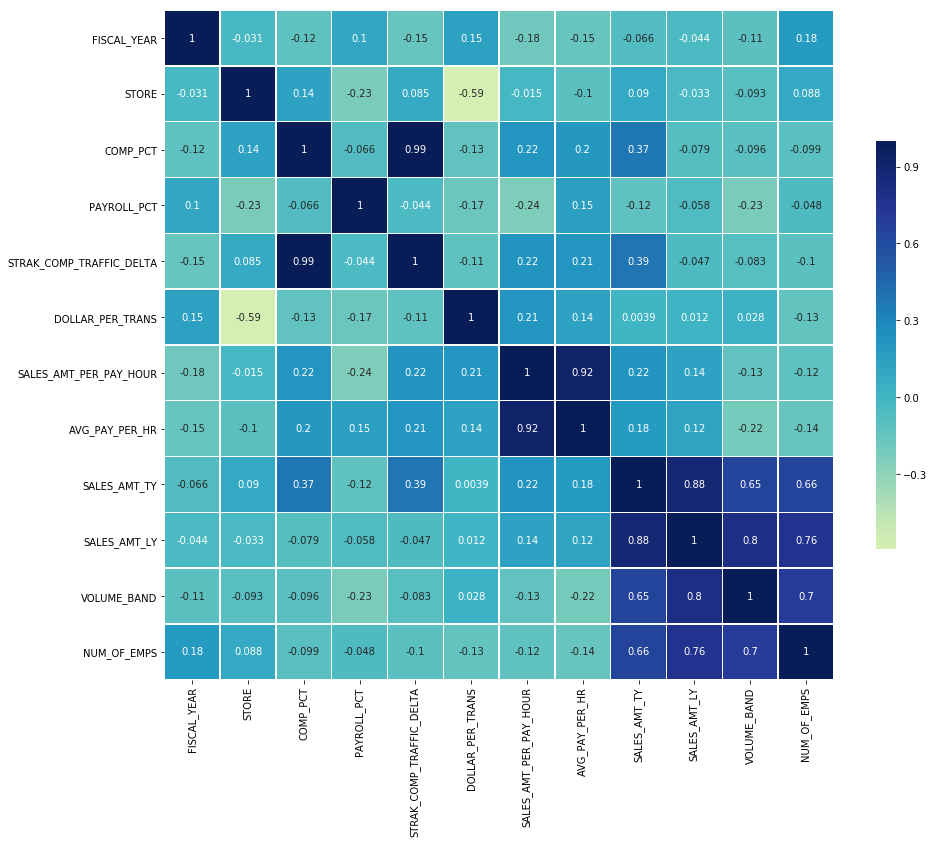

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))

corr = store_corr

sns.heatmap(corr, cmap='YlGnBu', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [27]:
df_access = df[['STORE',
'FISCAL_YEAR',
'FISCAL_WEEK',
'FISCAL_MONTH',
'COMP_PCT',
'MARK_DOWN_AMT_TY',
'SPECIAL_ORDER_AMT',
'SALES_VALUE',
'SHOES_UNITS',
'SHOES_VALUE',
'MULTI_VALUE',
'ACCESSORY_VALUE',
'TRANS_CNT_RETURNS',
'AVG_UNIT_PRICE',
'AVG_FOOTWEWAR_PRICE',
'AVG_NONFOOTWEWAR_PRICE',
'SALES_AMT_PER_PAY_HOUR',
'CLOSE_DATE']]
df_access.head()

,STORE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,COMP_PCT,MARK_DOWN_AMT_TY,SPECIAL_ORDER_AMT,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_VALUE,ACCESSORY_VALUE,TRANS_CNT_RETURNS,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,SALES_AMT_PER_PAY_HOUR,CLOSE_DATE
0,1504,2017,1,1,0.034622,1855.11,892.46,22003.18,63,9955.58,4240.92,12047.60,0,0.013453,158.025079,51.706438,113.787971,NaN
1,1504,2017,2,1,-0.255050,1986.70,1913.86,17499.35,54,7630.28,3869.02,9869.07,2,0.015429,141.301481,45.690139,96.542811,NaN
2,1504,2017,3,1,-0.327715,1331.95,2799.29,15004.60,65,9422.12,3751.73,5582.48,0,0.014062,144.955692,38.236164,81.876023,NaN
3,1504,2017,4,1,-0.261691,1744.41,2273.05,12770.09,43,6204.59,3178.74,6565.50,1,0.013234,144.292791,52.107143,69.679107,NaN
4,1504,2017,5,2,-0.188700,1582.45,3740.27,19920.51,65,9833.98,3753.46,10086.53,0,0.013755,151.292000,48.260909,111.082976,NaN


In [28]:
closed_stores = df_access.groupby('STORE')['CLOSE_DATE'].value_counts(normalize=True)
closed_stores

STORE  CLOSE_DATE
1643   31-DEC-17     1.0
1652   27-MAR-19     1.0
1670   30-JAN-19     1.0
1711   01-APR-19     1.0
1717   30-MAR-19     1.0
1803   29-MAY-19     1.0
1820   17-SEP-17     1.0
1832   30-JAN-19     1.0
2065   01-JUN-16     1.0
Name: CLOSE_DATE, dtype: float64

In [38]:
store_1643 = df.query('STORE == "1643"')
store_1643.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
3622,7,1643,19-MAR-16,2017,7,2,13687.47,12552.18,0.090446,2016,7,2,21-MAR-15,450.15,0.00,80,7,1057,88.85,13687.47,97,51,87,103,0.5544,0.8447,0.6995,92,2476.38,175,13687.47,71,11632.63,18,2689.76,88.86,1378.88,104,2054.84,46,487.6,4,138.5,0,0.00,7,448.74,1,42.00,12,684.00,34,254.0,0,...,1,9,7,0,2,2,0,98,9,9,85,0.032888,0.000000,0.091769,12.949357,141.107938,11.896455,-0.001323,2.058824,161.029059,0.253521,0.180923,0.405714,0.594286,0.012785,163.839859,19.758077,0.849874,0.150126,0.231225,0.100740,15.517443,154.034099,0,0,0.0,1,5,5.0,0,0,0.0,1,-1,-1.0,2,4,2,BATON ROUGE,Mall,31-DEC-17,943,01-OCT-97,1
3623,7,1643,26-MAR-16,2017,8,2,9846.85,11274.51,-0.126627,2016,8,2,28-MAR-15,802.16,0.00,115,7,1066,118.47,9846.85,84,28,73,86,0.4444,0.8488,0.6466,63,1041.88,143,9846.85,53,7677.52,10,1134.88,118.45,1609.91,90,2169.33,30,303.6,1,25.0,1,198.00,13,785.73,0,0.00,10,635.00,35,222.0,0,...,5,5,3,1,1,3,0,89,5,5,71,0.081464,0.000000,0.078799,9.237195,117.224405,8.998059,-0.205426,2.014085,138.688028,0.188679,0.105808,0.370629,0.629371,0.014522,144.858868,24.103667,0.779693,0.220307,0.147819,0.163495,13.591473,83.130857,0,0,0.0,1,12,12.0,0,0,0.0,1,6,6.0,2,18,9,BATON ROUGE,Mall,31-DEC-17,943,01-OCT-97,1
3624,7,1643,02-APR-16,2017,9,3,10259.90,16689.45,-0.385246,2016,9,3,04-APR-15,437.66,800.25,101,6,882,100.92,10259.90,67,21,68,76,0.3962,0.8947,0.6455,53,1575.97,136,10259.90,52,7918.59,20,3046.88,100.91,1371.37,84,2341.31,43,464.3,0,0.0,2,446.00,18,1105.50,-1,-325.00,8,576.00,15,174.5,0,...,3,6,3,0,3,0,0,70,6,6,58,0.042657,0.047949,0.075964,11.632540,153.132836,8.739596,-0.461210,2.344828,176.894828,0.384615,0.153605,0.382353,0.617647,0.013255,152.280577,27.872738,0.771800,0.228200,0.384776,0.133663,13.590031,101.673769,0,0,0.0,1,19,19.0,0,0,0.0,1,13,13.0,2,32,16,BATON ROUGE,Mall,31-DEC-17,943,01-OCT-97,1
3625,7,1643,09-APR-16,2017,10,3,8516.36,10056.39,-0.153139,2016,10,3,11-APR-15,614.60,603.25,77,7,779,96.92,8516.36,63,37,59,69,0.6271,0.8551,0.7411,59,919.99,126,8516.36,42,6431.37,12,1661.09,96.91,1120.06,84,2084.99,47,498.3,1,25.0,1,248.00,6,365.50,2,71.99,13,713.20,14,163.0,

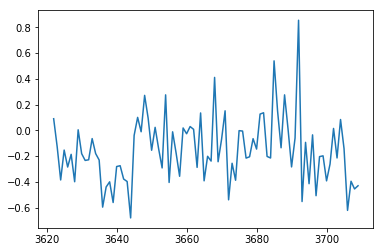

In [40]:
store_1643.COMP_PCT.plot()

In [30]:
store_1652 = df.query('STORE == "1652"')
store_1652.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
4219,7,1652,06-FEB-16,2017,1,1,12072.44,10710.53,0.127156,2016,1,1,07-FEB-15,1399.06,0.0,99,7,662,97.19,12072.44,86,37,94,102,0.6379,0.9216,0.7798,58,1655.99,154,12072.44,58,8937.47,33,5114.51,99.21,1515.79,96,3134.97,19,164.30,3,57.25,2,426.00,31,1863.42,0,0.0,8,466.00,33,158.0,0,...,8,15,10,0,5,5,0,94,15,15,58,0.115889,0.0,0.129909,18.236314,140.377209,6.811400,-0.002753,2.655172,208.145517,0.568966,0.137171,0.376623,0.623377,0.012756,154.094310,32.655938,0.740320,0.259680,0.572255,0.125558,15.278601,121.685717,0,0,0.0,2,774,387.0,0,0,0.0,1,225,225.0,3,999,333,CHERRY HILL,Mall,27-MAR-19,1745,22-MAY-97,2
4220,7,1652,13-FEB-16,2017,2,1,14968.80,13292.28,0.126127,2016,2,1,14-FEB-15,1173.97,0.0,95,7,735,97.67,14968.80,90,43,96,106,0.5181,0.9057,0.7119,83,2631.88,196,14968.80,59,9641.86,27,4285.36,97.67,1701.79,137,5326.94,31,317.00,4,138.50,5,663.98,43,3051.71,2,82.0,8,481.25,40,238.5,4,...,10,10,8,0,2,3,0,100,10,10,67,0.078428,0.0,0.122449,20.365714,166.320000,7.525340,0.003678,2.925373,223.414925,0.457627,0.175824,0.301020,0.698980,0.013094,163.421356,38.882774,0.644130,0.355870,0.444454,0.113689,17.423876,153.258933,0,0,0.0,2,788,394.0,0,0,0.0,1,232,232.0,3,1020,340,CHERRY HILL,Mall,27-MAR-19,1745,22-MAY-97,2
4221,7,1652,20-FEB-16,2017,3,1,13079.22,8836.26,0.480176,2016,3,1,21-FEB-15,531.56,0.0,98,7,680,103.15,13079.22,69,41,80,83,0.5857,0.9639,0.7748,70,2623.43,155,13079.22,58,9416.13,32,4884.33,103.20,1645.26,97,3663.09,28,294.40,9,239.00,3,514.00,24,1567.72,0,0.0,12,804.00,18,154.0,3,...,8,10,5,1,4,2,1,78,10,10,49,0.040642,0.0,0.101471,19.234147,189.553913,6.592341,0.378705,3.163265,266.922857,0.551724,0.200580,0.374194,0.625806,0.011851,162.347069,37.763814,0.719931,0.280069,0.518719,0.125792,15.942442,126.736628,0,0,0.0,2,802,401.0,0,0,0.0,1,239,239.0,3,1041,347,CHERRY HILL,Mall,27-MAR-19,1745,22-MAY-97,2
4222,7,1652,27-FEB-16,2017,4,1,17384.92,9387.68,0.851887,2016,4,1,28-FEB-15,877.53,0.0,109,7,671,112.91,17384.92,107,77,119,125,0.6471,0.9520,0.7995,119,3417.74,227,17384.92,81,12460.95,43,6321.17,112.90,3181.86,146,4923.97,46,439.50,1,25.00,6,928.00,29,203

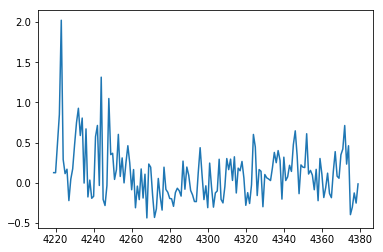

In [31]:
store_1652.COMP_PCT.plot()

In [32]:
store_1670 = df.query('STORE == "1670"')
store_1670.head()

,DIV,STORE,WEEK_END_DATE,FISCAL_YEAR,FISCAL_WEEK,FISCAL_MONTH,SALES_AMT_TY,SALES_AMT_LY,COMP_PCT,FISCAL_YEAR_LY,FISCAL_WEEK_LY,FISCAL_MONTH_LY,WEEK_END_DATE_LY,MARK_DOWN_AMT_TY,MARK_DOWN_AMT_LY,PAYROLL_ADJ_HOURS,NUM_OF_DAYS,STRAK_TRAFFIC,STRAK_HRS,STRAK_SALES_AMT,STRAK_TRANSACTION_NUM,CP_VALID_EMAILS,CP_VALID_MAILING_ADDRESS,CP_TOTAL_TRANS,CP_EMAILS_PER_TRANS,CP_MAIL_ADD_CAPTURE_RATE,CP_EMAIL_MAIL_CAPTURE_RATE,CP_TOTAL_EMAIL_TRANS,SPECIAL_ORDER_AMT,SALES_UNITS,SALES_VALUE,SHOES_UNITS,SHOES_VALUE,MULTI_UNITS,MULTI_VALUE,PAYROLL_UNITS,PAYROLL_VALUE,ACCESSORY_UNITS,ACCESSORY_VALUE,ACCESSORY_HOSIERY_UNITS,ACCESSORY_HOSIERY_VALUE,ACCESSORY_SHOE_TREES_UNITS,ACCESSORY_SHOE_TREES_VALUE,ACCESSORY_COATS_UNITS,ACCESSORY_COATS_VALUE,ACCESSORY_SHIRT_SWEATER_UNITS,ACCESSORY_SHIRT_SWEATER_VALUE,ACCESSORY_PLGS_LUGGAGE_UNITS,ACCESSORY_PLGS_LUGGAGE_VALUE,ACCESSORY_BELTS_UNITS,ACCESSORY_BELTS_VALUE,ACCESSORY_SHOE_CARE_UNITS,ACCESSORY_SHOE_CARE_VALUE,ACCESSORY_OTHER_UNITS,...,TRANS_CNT_RETURNS,TRANS_CNT_EXCHG,TRANS_CNT_EXCHG_EVEN,TRANS_CNT_EXCHG_OUT,TRANS_CNT_EXCHG_IN,TRANS_CNT_EMPL_SALES,TRANS_CNT_EMPL_RETURNS,TRANS_CNT_TOTAL,TRANS_CNT_EXCHG_CASHIER,TRANS_CNT_EXCHG_ORIGINAL,METRIC_TRANS_NUM,TY_MARK_DOWN_PCT,LY_MARK_DOWN_PCT,STRAK_CONVERSION_PCT,STRAK_SLS_PER_SHOPPER,STRAK_AVG_TRANS_SIZE,STRAK_SHOPPER_TO_ASSOC_RATIO,STRAK_COMP_TRAFFIC_DELTA,UNITS_PER_TRANS,DOLLAR_PER_TRANS,SHOE_MULTI_PCT,SPECIAL_ORDER_PCT_TO_SLS,FOOTWEAR_UNITS_PCT,NONFOOTWEAR_UNITS_PCT,AVG_UNIT_PRICE,AVG_FOOTWEWAR_PRICE,AVG_NONFOOTWEWAR_PRICE,FOOTWEAR_AMT_PCT,NONFOOTWEAR_AMT_PCT,MULTI_AMT_PCT,PAYROLL_PCT,AVG_PAY_PER_HR,SALES_AMT_PER_PAY_HOUR,MGR_COUNT,MGR_TENURE_DAYS,AVG_MGR_TENURE_DAYS,AM_COUNT,AM_TENURE_DAYS,AVG_AM_TENURE_DAYS,FT_COUNT,FT_TENURE_DAYS,AVG_FT_TENURE_DAYS,PT_COUNT,PT_TENURE_DAYS,AVG_PT_TENURE_DAYS,NUM_OF_EMPS,TOT_TENURE_DAYS,TOT_AVG_TENURE_DAYS,STORE_CITY,CLASS,CLOSE_DATE,GROSS_FEET,OPEN_DATE,VOLUME_BAND
5421,7,1670,06-FEB-16,2017,1,1,46855.64,20565.75,1.278334,2016,1,1,07-FEB-15,2816.96,0.0,284,7,1042,295.93,46855.64,267,137,262,318,0.6524,0.8239,0.7381,210,2419.40,593,46855.64,207,33813.36,104,16329.99,295.84,5907.11,386,13042.28,98,1083.65,19,489.0,12,3109.16,48,3181.07,14,861.99,40,2680.98,138,631.5,11,...,22,34,24,2,8,7,1,290,34,34,204,0.060120,0.0,0.256238,44.967025,175.489288,3.521103,1.022096,2.906863,229.684510,0.502415,0.051635,0.349073,0.650927,0.012656,163.349565,33.788290,0.721650,0.278350,0.482945,0.126070,19.967246,158.381693,1,3513,3513.0,2,6097,3048.5,4,14769,3692.25,2,456,228.0,9,24835,2759,NEW YORK,Street,30-JAN-19,2500,15-JUN-00,5
5422,7,1670,13-FEB-16,2017,2,1,36134.40,17169.84,1.104527,2016,2,1,14-FEB-15,1008.20,0.0,297,7,793,304.49,36134.40,221,138,241,281,0.6188,0.8577,0.7382,223,9654.73,481,36134.40,157,26913.46,69,11196.32,304.57,6231.93,324,9220.94,117,1281.60,19,493.5,7,1657.99,18,1154.45,9,925.24,27,1849.15,92,318.0,20,...,25,36,25,0,11,2,1,247,36,36,158,0.027901,0.0,0.278689,45.566709,163.504072,2.604355,0.825838,3.044304,228.698734,0.439490,0.267189,0.326403,0.673597,0.013311,171.423312,28.459691,0.744815,0.255185,0.416012,0.172465,20.461405,118.640707,1,3520,3520.0,2,6111,3055.5,4,14797,3699.25,2,470,235.0,9,24898,2766,NEW YORK,Street,30-JAN-19,2500,15-JUN-00,5
5423,7,1670,20-FEB-16,2017,3,1,34530.05,16866.98,1.047198,2016,3,1,21-FEB-15,1025.27,0.0,277,7,872,282.52,34530.05,218,157,235,273,0.6382,0.8608,0.7495,246,6372.72,451,34530.05,162,27044.87,76,12788.73,282.34,5182.02,289,7485.18,79,859.70,31,722.0,8,939.97,21,1395.08,4,514.00,26,1707.00,103,430.5,15,...,19,32,22,1,9,1,1,238,32,32,166,0.029692,0.0,0.250000,39.598681,158.394725,3.086507,0.797198,2.716867,208.012349,0.469136,0.184556,0.359202,0.640798,0.013061,166.943642,25.900277,0.783227,0.216773,0.472871,0.150073,18.353829,122.299532,1,3527,3527.0,2,6125,3062.5,4,14825,3706.25,2,484,242.0,9,24961,2773,NEW YORK,Street,30-JAN-19,2500,15-JUN-00,5
5424,7,1670,27-FEB-16,2017,4,1,42519.55,17222.74,1.468803,2016,4,1,28-FEB-15,1444.33,0.0,288,7,905,295.45,42519.55,240,155,232,285,0.5

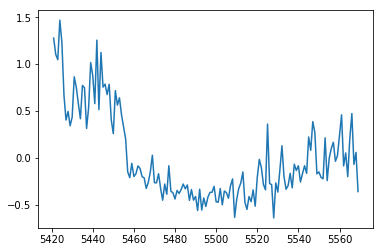

In [39]:
store_1670.COMP_PCT.plot()

In [51]:
df.plot(df['FISCAL_YEAR'], color="cyan", subplots=True)
#lt.scatter(df['STORE'], df['PAYROLL_PCT'], color="red")
#plt.scatter(df_2019_gb['PAYROLL_PCT'], df_2019_gb['AVG_PAY_PER_HR'], color="green", alpha=.6)
plt.xlabel("PAYROLL_PCT")
plt.ylabel("AVERAGE PAY PER HOUR")
plt.title('PAYROLL % vs AVERAGE PAY PER HOUR')
plt.legend(labels=['2017', '2018', '2019'])
plt.show()

KeyError: '[2017 2017 2017 ... 2020 2020 2020] not in index'